In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Load dataset (adjust filename if different)
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")

print("\nFirst 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# 2. Encoding the Essential Features

# Encode categorical features (Yes/No -> 1/0)
df.replace({"yes": 1, "no": 0}, inplace=True)

# One-hot encode for categorical variables
df = pd.get_dummies(df, drop_first=True)

print("\nColumns after preprocessing:")
print(df.columns)

# Features and Target
X = df.drop("price", axis=1)
y = df["price"]


Columns after preprocessing:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


/tmp/ipython-input-2626892616.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"yes": 1, "no": 0}, inplace=True)


In [4]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# 4. Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [6]:
# 5. Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Model Evaluation:
MAE  : 970043.40
MSE  : 1754318687330.66
RMSE : 1324506.96
R²   : 0.6529


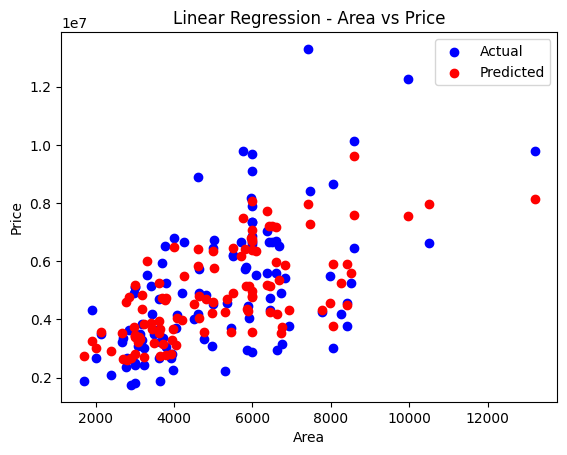

In [7]:
# 6. Plot Regression Line (for one feature)

# Let's visualize with 'area' (if present in dataset)
if "area" in X.columns:
    plt.scatter(X_test["area"], y_test, color="blue", label="Actual")
    plt.scatter(X_test["area"], y_pred, color="red", label="Predicted")
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Linear Regression - Area vs Price")
    plt.legend()
    plt.show()

In [8]:
# 7. Interpret Coefficients

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nModel Coefficients (Interpretation):")
print(coefficients.sort_values(by="Coefficient", ascending=False))



Model Coefficients (Interpretation):
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
